<a href="https://colab.research.google.com/github/Geu-Pro2023/WildGuard_Classification_Model/blob/main/Geu_Aguto_Summative_Assignment_Model_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Optimization Techniques in Machine Learning**

### **Project: WildGuard_Classification_Model**

##### This project focuses on classifying wild animals as endangered or non-endangered using machine learning models.
It explores the implementation of Convolutional Neural Networks (CNNs) and classical machine learning algorithms (e.g., Logistic Regression, Random Forest) while applying optimization techniques such as regularization, dropout, and early stopping. The goal is to improve model performance, convergence speed, and efficiency.

### **Overview of the Data**

**The dataset consists of images of wild animals categorized into two classes:**

   1. Endangered: Animals at risk of extinction.
   2. Non-Endangered: Animals not currently at risk.
      
**Dataset Details**

**Source:** Publicly available dataset on kaggle: **90-different-animals-image-classification**
   1. Size: Approximately 1,000 images (500 per class) but used 600 images (300 per class).
   2. Format: Images are resized to 150x150 pixels and normalized to the range [0, 1].

### **Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.regularizers import l2
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings("ignore")
from tensorflow.keras.regularizers import l1
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import cv2
import pickle
import random
import joblib
import matplotlib.pyplot as plt
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.ensemble import RandomForestClassifier

### **Load the dataset**

In [ ]:
DIRECTORY = "/kaggle/input/90-different-animals-image-classification/wild_animals"
CATEGORIES = ['Endangered', 'Non Endangered']

In [ ]:
DIR = "/kaggle/input/90-different-animals-image-classification/wild_animals"
IMG_SIZE = 150

### **Join the Image Path and the Image Categories**

In [ ]:
for category in CATEGORIES:
  path = os.path.join(DIRECTORY,category)
  print(path)

/kaggle/input/90-different-animals-image-classification/wild_animals/Endangered
/kaggle/input/90-different-animals-image-classification/wild_animals/Non Endangered


In [ ]:
print(os.listdir(DIRECTORY))

['Non Endangered', 'Endangered']


### **Check the number of images in each catergory**

In [ ]:
#Counting the number of files in each category
endangered_count = len(os.listdir(os.path.join(DIRECTORY, 'Endangered')))
non_endangered_count = len(os.listdir(os.path.join(DIRECTORY, 'Non Endangered')))

print(f"Endangered samples: {endangered_count}")
print(f"Non-Endangered samples: {non_endangered_count}")

Endangered samples: 300
Non-Endangered samples: 300


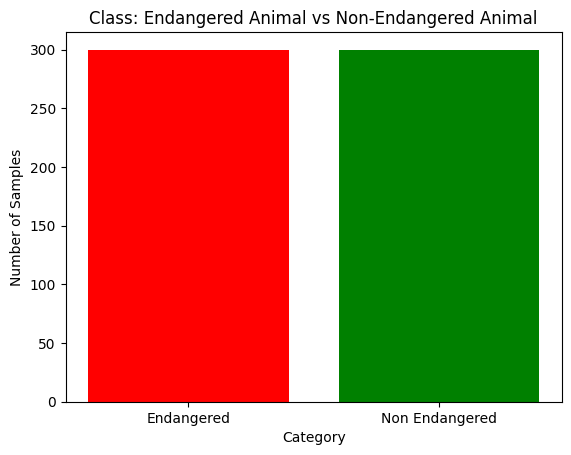

In [ ]:
labels = ['Endangered', 'Non Endangered']
counts = [endangered_count, non_endangered_count]

plt.bar(labels, counts, color=['red', 'green'])
plt.title('Class: Endangered Animal vs Non-Endangered Animal')
plt.xlabel('Category')
plt.ylabel('Number of Samples')
plt.show()

### **Check the outliers in the image dataset**

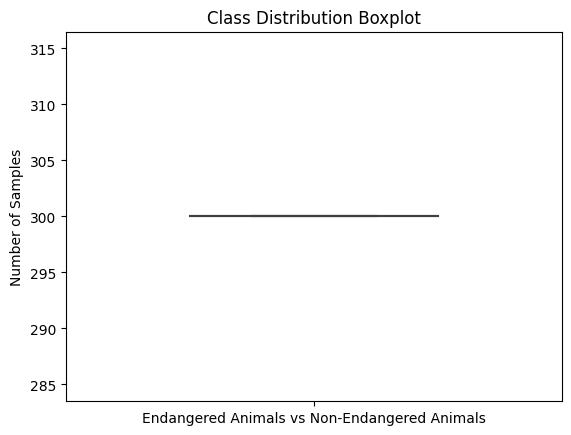

In [ ]:
#Create a boxplot to visualize the distribution and potential outliers
data = [endangered_count, non_endangered_count]

sns.boxplot(data=data, width=0.5)
plt.xticks([0], ['Endangered Animals vs Non-Endangered Animals'])
plt.title('Class Distribution Boxplot')
plt.ylabel('Number of Samples')
plt.show()

### **List Image in the folder**

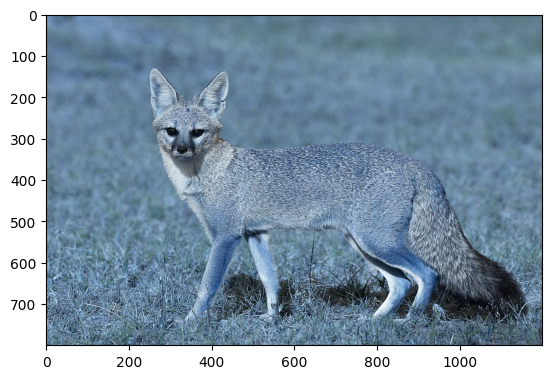

In [ ]:
for category in CATEGORIES:
  path = os.path.join(DIRECTORY,category)
  for img in os.listdir(path):
    img_path = os.path.join(path,img)
    img_arr = cv2.imread(img_path)
    plt.imshow(img_arr)
    break

### **Resizing the image**

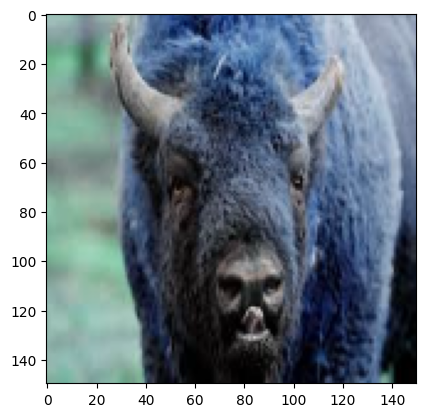

In [ ]:
for category in CATEGORIES:
  path = os.path.join(DIRECTORY,category)
  for img in os.listdir(path):
    img_path = os.path.join(path,img)
    img_arr = cv2.imread(img_path)
    img_arr = cv2.resize(img_arr,(IMG_SIZE,IMG_SIZE))
    plt.imshow(img_arr)

### **Display the images in both catergories with their actual sizes**

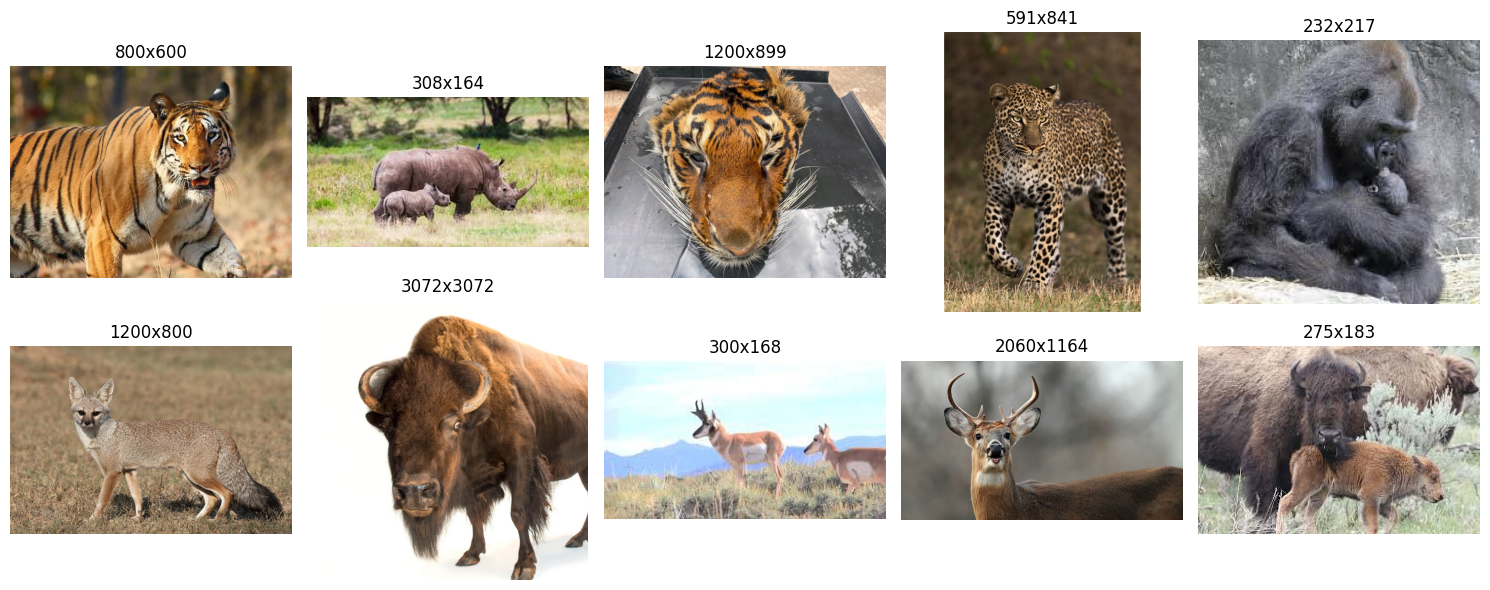

In [ ]:
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
i = 0
for cat in CATEGORIES:
    for filename in os.listdir(os.path.join(DIR, cat))[:5]:
        img_path = os.path.join(DIR, cat, filename)
        img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
        h, w = img.shape[:2]
        axes.flat[i].imshow(img)
        axes.flat[i].set_title(f"{w}x{h}")
        axes.flat[i].axis("off")
        i += 1
plt.tight_layout()
plt.show()

### **Resizing all the images for training**

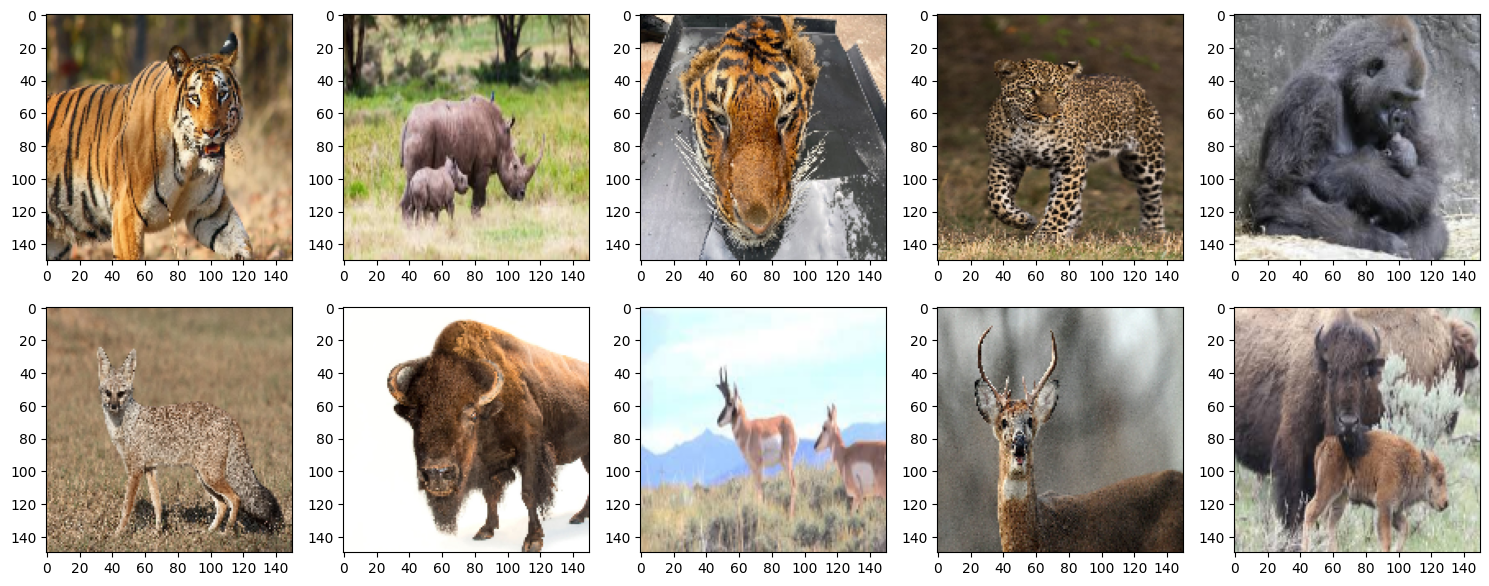

In [ ]:
#Resize all the images in the dataset before training the model
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
i = 0
for cat in CATEGORIES:
    for filename in os.listdir(os.path.join(DIR, cat))[:5]:
        img_path = os.path.join(DIR, cat, filename)
        img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)

        img_resized = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

        axes.flat[i].imshow(img_resized)
        axes.flat[i].axis("on")

        axes.flat[i].set_xticks(range(0, IMG_SIZE, 20))
        axes.flat[i].set_yticks(range(0, IMG_SIZE, 20))
        axes.flat[i].axis('on')
        i += 1

plt.tight_layout()
plt.show()

In [ ]:
#Join the total number of images in both catergories
data = []
for category in CATEGORIES:
  path = os.path.join(DIRECTORY,category)
  label = CATEGORIES.index(category)
  for img in os.listdir(path):
    img_path = os.path.join(path,img)
    img_arr = cv2.imread(img_path)
    img_arr = cv2.resize(img_arr,(IMG_SIZE,IMG_SIZE))
    data.append([img_arr,label])

In [ ]:
len(data)

600

### **Randomizing the data and splitting into input matrix (X) and output vector (y)**

In [ ]:
# Shuffle the data
random.shuffle(data)

X = []
y = []

for features, label in data:
    X.append(features)
    y.append(label)

X = np.array(X)
y = np.array(y)

# Normalize the images to the range [0, 1]
X = X / 255.0
print(X.shape)

(600, 150, 150, 3)


In [ ]:
# Save the processed data
pickle.dump(X, open('X.pkl', 'wb'))
pickle.dump(y, open('y.pkl', 'wb'))

### **Split the data into training, testing, and validation sets**

In [ ]:
# Split the data into training, testing, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)
print("Validation data shape:", X_val.shape)

Training data shape: (360, 150, 150, 3)
Test data shape: (120, 150, 150, 3)
Validation data shape: (120, 150, 150, 3)


### [](http://)**Define Neural Network**

#Model architecture

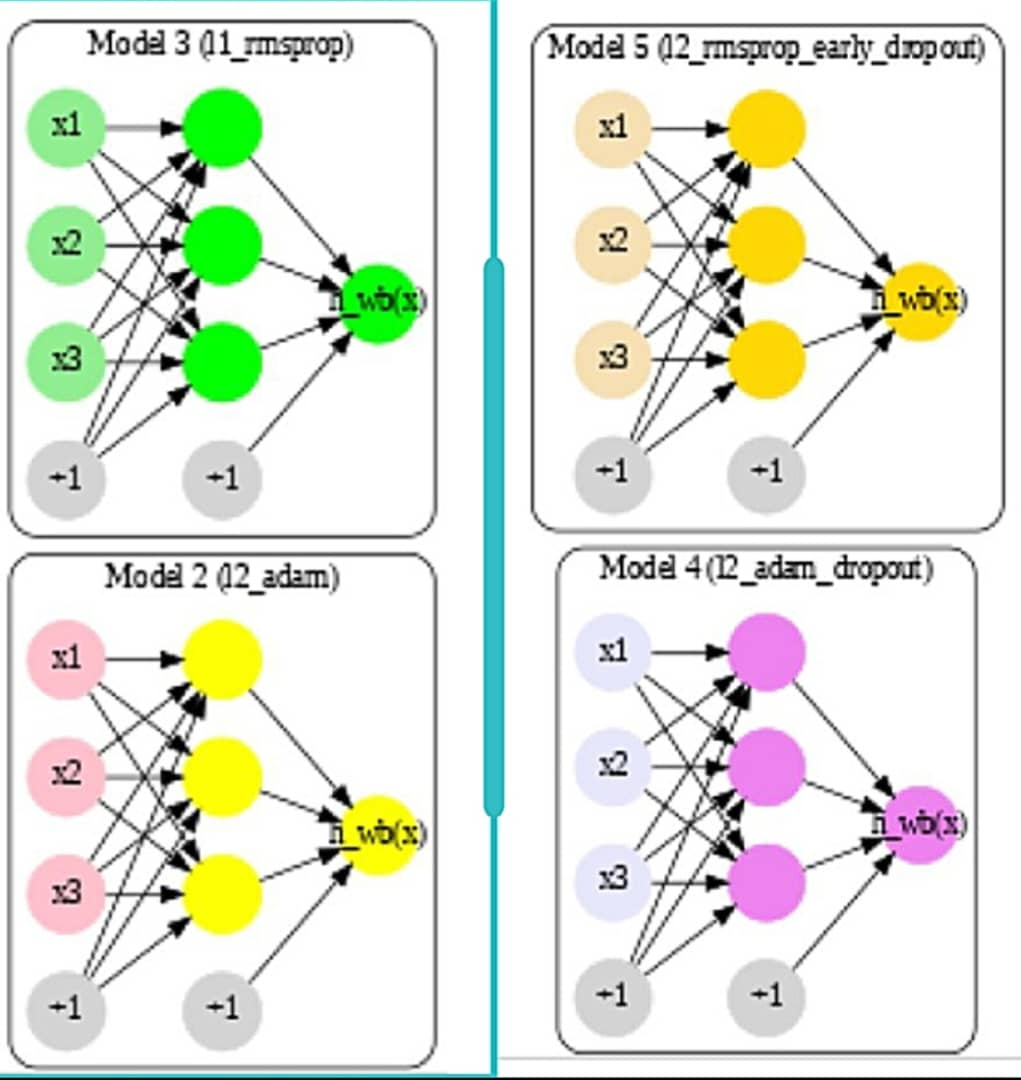

In [ ]:
#Define a function that creates models without and With specified Optimization techniques

def define_model(optimizer='adam', regularizer=None, early_stopping=False, dropout_rate=0.0, learning_rate=0.001):
    """
    Define a CNN model with specified optimization techniques.

    Args:
        optimizer (str): Optimizer to use ('adam' or 'rmsprop').
        regularizer (str): Regularizer to use ('l1', 'l2', or None).
        early_stopping (bool): Whether to use early stopping.
        dropout_rate (float): Dropout rate (0.0 means no dropout).
        learning_rate (float): Learning rate for the optimizer.

    Returns:
        model: Compiled Keras model.
    """
    # Define the model architecture
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3), kernel_regularizer=regularizer),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizer),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizer),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu', kernel_regularizer=regularizer),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')
    ])

    # Define the optimizer
    if optimizer == 'adam':
        opt = Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
        opt = RMSprop(learning_rate=learning_rate)
    else:
        raise ValueError("Optimizer must be 'adam' or 'rmsprop'.")

    # Compile the model
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

    return model

#### **Model 1: Default CNN (No Optimization Techniques)**

In [ ]:
#Model1: Default CNN (No Optimization Techniques)
model1.summary()
model1 = define_model(optimizer='adam', regularizer=None, early_stopping=False, dropout_rate=0.0)
history1 = model1.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), verbose=1)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,485,445 (55.26 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,656,964 (36.84 MB)

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 170ms/step - accuracy: 0.5328 - loss: 0.9202 - val_accuracy: 0.4500 - val_loss: 0.7114
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5323 - loss: 0.6909 - val_accuracy: 0.4500 - val_loss: 0.8057
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5530 - loss: 0.6946 - val_accuracy: 0.4750 - val_loss: 0.7019
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5965 - loss: 0.6519 - val_accuracy: 0.4500 - val_loss: 0.7485
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6253 - loss: 0.6357 - val_accuracy: 0.4750 - val_loss: 0.7586
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6713 - loss: 0.6142 - val_accuracy: 0.6083 - val_loss: 0.6677
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7590 - loss: 0.5369 - val_accuracy: 0.5500 - val_loss: 1.0418
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7757 - loss: 0.4611 - val_accuracy: 0.6000 - 

#### **Confusion Matrix for Default CNN (No Optimization Techniques)**

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


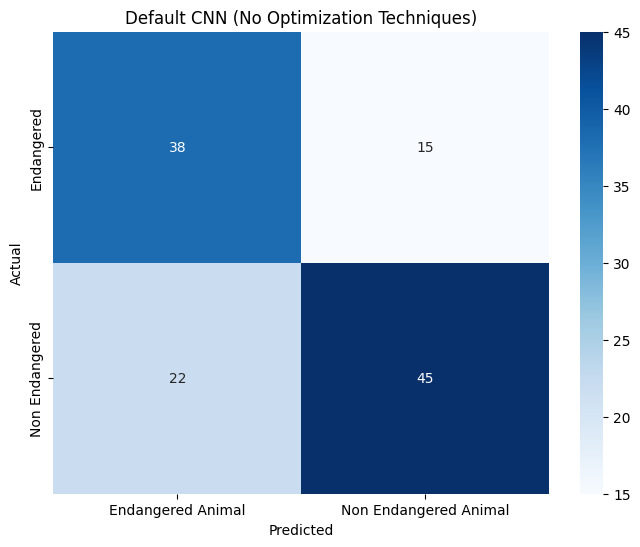

In [ ]:
#Default CNN (No Optimization Techniques)
y_pred5 = model1.predict(X_test)
y_pred5 = (y_pred5 > 0.5).astype(int)

cm6 = confusion_matrix(y_test, y_pred5)

plt.figure(figsize=(8, 6))
sns.heatmap(cm6, annot=True, fmt='d', cmap='Blues', xticklabels=['Endangered Animal', 'Non Endangered Animal'], yticklabels=['Endangered', 'Non Endangered'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Default CNN (No Optimization Techniques)')
plt.show()

#### **Model 2: CNN with L2 Regularization**

In [ ]:
#Model2: CNN with L2 Regularization
model2.summary()
l2_reg = l2(0.001)
model2 = define_model(optimizer='adam', regularizer=l2_reg, early_stopping=False, dropout_rate=0.0)
history2 = model2.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), verbose=1)

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_27 (Conv2D)                   │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_27 (MaxPooling2D)      │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_28 (MaxPooling2D)      │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_29 (MaxPooling2D)      │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,485,445 (55.26 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,656,964 (36.84 MB)

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 198ms/step - accuracy: 0.4587 - loss: 1.5455 - val_accuracy: 0.5500 - val_loss: 0.9368
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5461 - loss: 0.9338 - val_accuracy: 0.4500 - val_loss: 0.9259
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5454 - loss: 0.8836 - val_accuracy: 0.5833 - val_loss: 0.8537
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5864 - loss: 0.8409 - val_accuracy: 0.5500 - val_loss: 0.8319
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6109 - loss: 0.8032 - val_accuracy: 0.5833 - val_loss: 0.8173
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6843 - loss: 0.7595 - val_accuracy: 0.5417 - val_loss: 0.8845
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6968 - loss: 0.7146 - val_accuracy: 0.5750 - val_loss: 0.8164
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6850 - loss: 0.7085 - val_accuracy: 0.5750 - 

#### **Confusion Matrix for CNN with L2 Regularization**

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


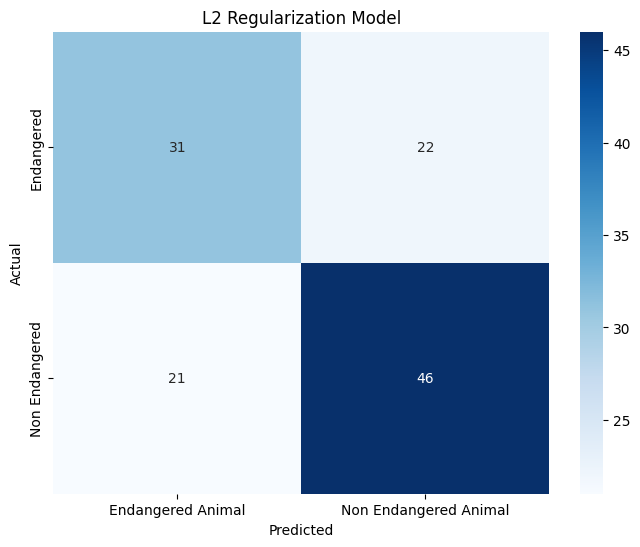

In [ ]:
#CNN with L2 Regularization)
y_pred5 = model2.predict(X_test)
y_pred5 = (y_pred5 > 0.5).astype(int)

cm6 = confusion_matrix(y_test, y_pred5)

plt.figure(figsize=(8, 6))
sns.heatmap(cm6, annot=True, fmt='d', cmap='Blues', xticklabels=['Endangered Animal', 'Non Endangered Animal'], yticklabels=['Endangered', 'Non Endangered'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('L2 Regularization Model')
plt.show()

#### **Model 3: L2 Regularization, Adam optimizer, early stopping**

In [ ]:
#Model3: L2 Regularization, Adam optimizer, early stopping
model2.summary()
model3 = define_model(optimizer='adam', regularizer=l2(0.01), early_stopping=True, dropout_rate=0.0, learning_rate=0.001)
early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)
history3 = model2.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping], verbose=1)

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_57 (Conv2D)                   │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_57 (MaxPooling2D)      │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_58 (Conv2D)                   │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_58 (MaxPooling2D)      │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_59 (Conv2D)                   │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_59 (MaxPooling2D)      │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_19 (Flatten)                 │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,485,445 (55.26 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,656,964 (36.84 MB)

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9838 - loss: 0.1931 - val_accuracy: 0.6250 - val_loss: 1.4125
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 1.0000 - loss: 0.1592 - val_accuracy: 0.6500 - val_loss: 1.5894
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9985 - loss: 0.1518 - val_accuracy: 0.6833 - val_loss: 1.6784
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9953 - loss: 0.1471 - val_accuracy: 0.6417 - val_loss: 1.6646
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9594 - loss: 0.2142 - val_accuracy: 0.6500 - val_loss: 1.4918


#### **Confusion Matrix for L2 Regularization with  Adam optimizer and early stopping¶**

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


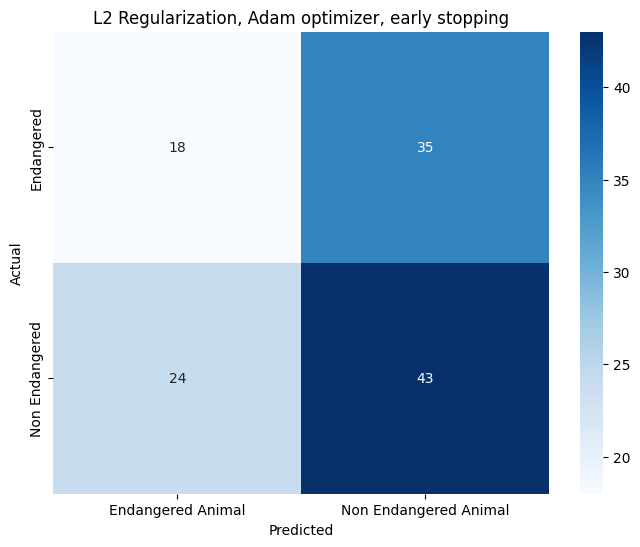

In [ ]:
#L2 Regularization, Adam optimizer, early stopping
y_pred5 = model3.predict(X_test)
y_pred5 = (y_pred5 > 0.5).astype(int)

cm6 = confusion_matrix(y_test, y_pred5)

plt.figure(figsize=(8, 6))
sns.heatmap(cm6, annot=True, fmt='d', cmap='Blues', xticklabels=['Endangered Animal', 'Non Endangered Animal'], yticklabels=['Endangered', 'Non Endangered'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('L2 Regularization, Adam optimizer, early stopping')
plt.show()

#### **Model 4: L1 Regularization, RMSprop optimizer, no early stopping**

In [ ]:
#Model4: L1 Regularization, RMSprop optimizer, no early stopping
model4.summary()
model4 = define_model(optimizer='rmsprop', regularizer=l1(0.01), early_stopping=False, dropout_rate=0.0, learning_rate=0.001)
history4 = model3.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), verbose=1)

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)                   │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_26 (MaxPooling2D)      │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,656,964 (36.84 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,828,483 (18.42 MB)

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5100 - loss: 0.8040 - val_accuracy: 0.4750 - val_loss: 0.7984
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5050 - loss: 0.7965 - val_accuracy: 0.4750 - val_loss: 0.7913
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5050 - loss: 0.7896 - val_accuracy: 0.4750 - val_loss: 0.7847
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4814 - loss: 0.7832 - val_accuracy: 0.4750 - val_loss: 0.7787
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4753 - loss: 0.7774 - val_accuracy: 0.5250 - val_loss: 0.7731
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5093 - loss: 0.7719 - val_accuracy: 0.5250 - val_loss: 0.7680
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5274 - loss: 0.7668 - val_accuracy: 0.5250 - val_loss: 0.7633
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4457 - loss: 0.7622 - val_accuracy: 0.4750 - v

#### **Confusion Matrix for L1 Regularization with RMSprop optimize and no early stopping**

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


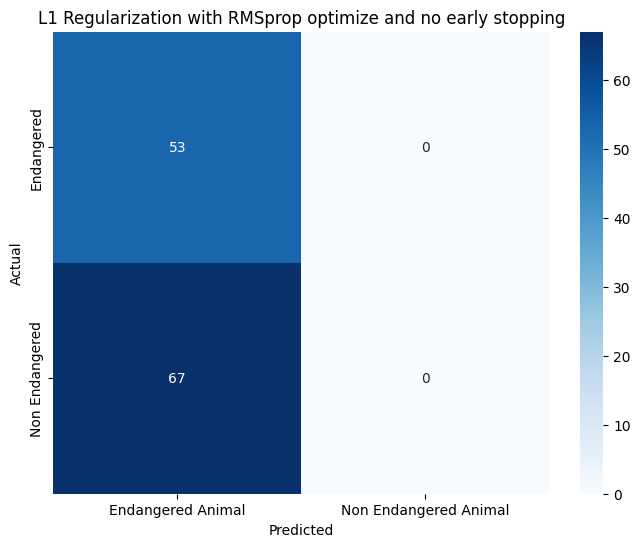

In [ ]:
#L1 Regularization with RMSprop optimize and no early stopping
y_pred5 = model4.predict(X_test)
y_pred5 = (y_pred5 > 0.5).astype(int)

cm6 = confusion_matrix(y_test, y_pred5)

plt.figure(figsize=(8, 6))
sns.heatmap(cm6, annot=True, fmt='d', cmap='Blues', xticklabels=['Endangered Animal', 'Non Endangered Animal'], yticklabels=['Endangered', 'Non Endangered'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('L1 Regularization with RMSprop optimize and no early stopping')
plt.show()

#### **Model 5: L2 Regularization, RMSprop optimizer, early stopping, dropout**

In [ ]:
#Model5: L2 Regularization, RMSprop optimizer, early stopping, dropout
model4.summary()
model5 = define_model(optimizer='rmsprop', regularizer=l2(0.01), early_stopping=True, dropout_rate=0.5, learning_rate=0.001)
history5 = model5.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping], verbose=1)

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)                   │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_30 (MaxPooling2D)      │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_31 (MaxPooling2D)      │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_32 (MaxPooling2D)      │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 220ms/step - accuracy: 0.4733 - loss: 4.7774 - val_accuracy: 0.5250 - val_loss: 2.3912
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5424 - loss: 2.1560 - val_accuracy: 0.4833 - val_loss: 1.5966
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5051 - loss: 1.4943 - val_accuracy: 0.5250 - val_loss: 1.2464
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4536 - loss: 1.1885 - val_accuracy: 0.6000 - val_loss: 1.0404


#### **Confusion Matrrix for L2 Regularization, RMSprop optimizer, early stopping, dropout**

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


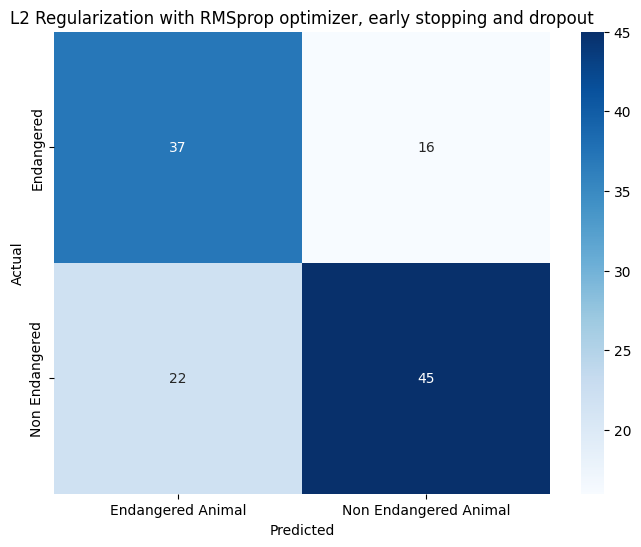

In [ ]:
#L2 Regularization, RMSprop optimizer, early stopping, dropout
y_pred5 = model5.predict(X_test)
y_pred5 = (y_pred5 > 0.5).astype(int)

cm6 = confusion_matrix(y_test, y_pred5)

plt.figure(figsize=(8, 6))
sns.heatmap(cm6, annot=True, fmt='d', cmap='Blues', xticklabels=['Endangered Animal', 'Non Endangered Animal'], yticklabels=['Endangered', 'Non Endangered'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('L2 Regularization with RMSprop optimizer, early stopping and dropout')
plt.show()

### **Plot the Models Accuracy and plot the Loss curve**

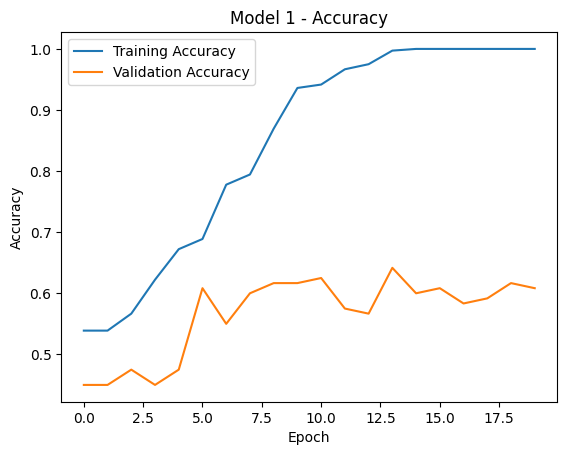

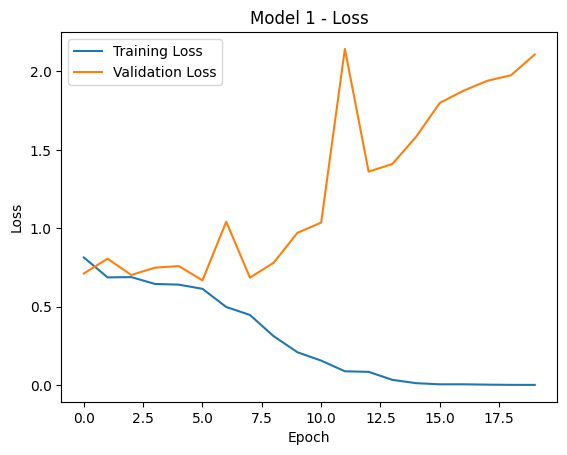

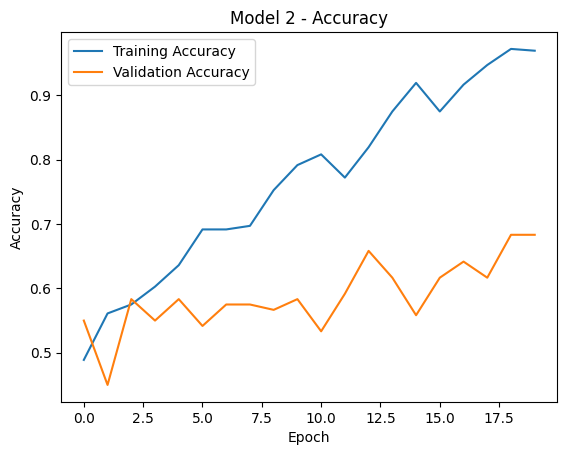

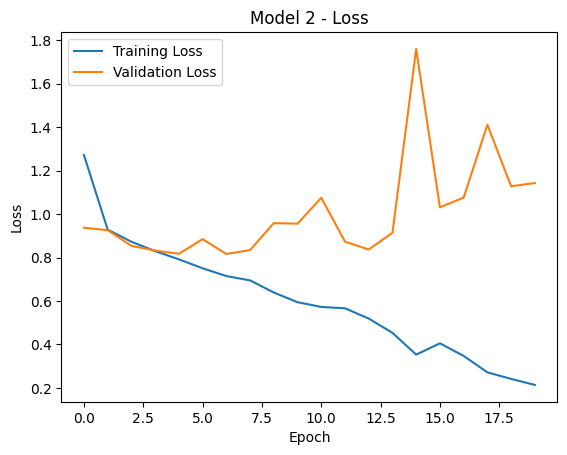

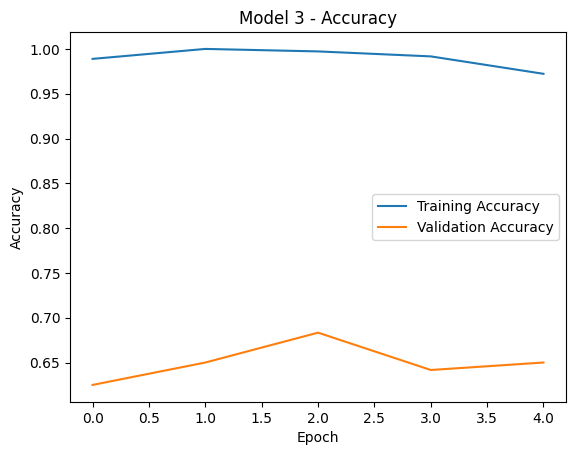

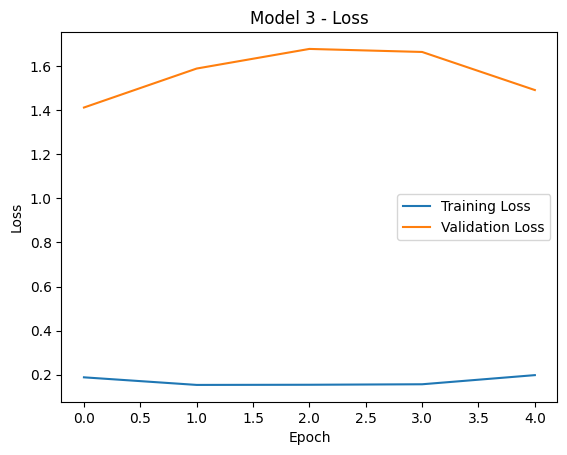

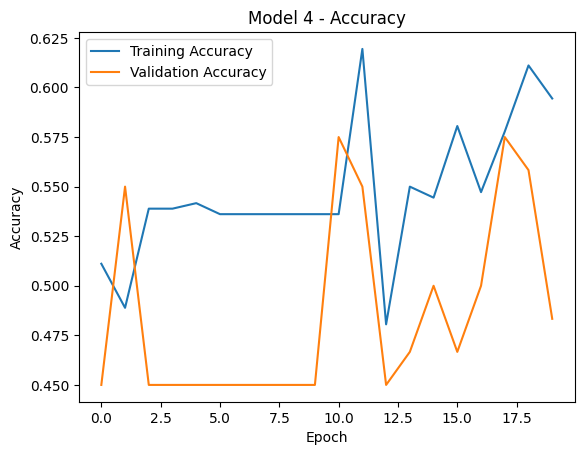

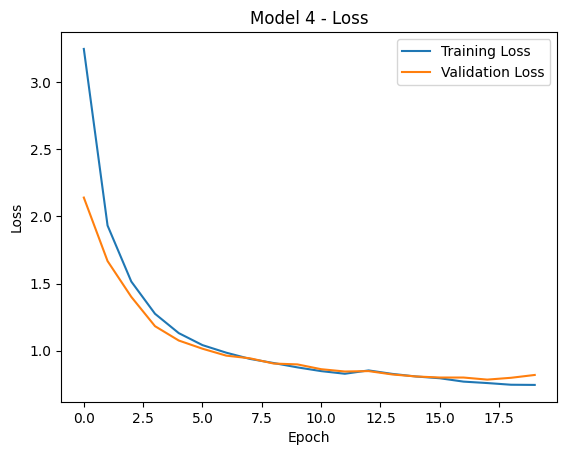

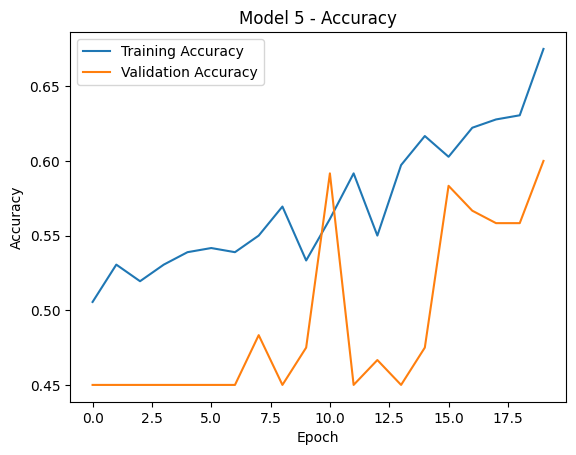

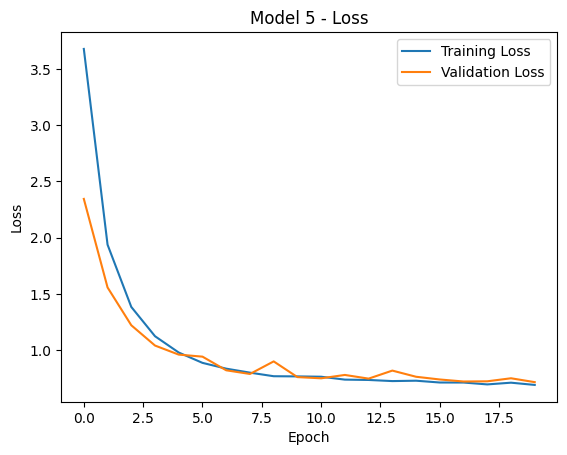

In [ ]:
# Plot loss and accuracy curves for each model
for model_name, history in zip(results.keys(), [history1, history2, history3, history4, history5]):
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [ ]:
def evaluate_model(model, X_test, y_test):
       evaluation = model.evaluate(X_test, y_test)
       test_loss = evaluation[0]
       test_accuracy = evaluation[1]
       return test_loss, test_accuracy
       print(f"Test Loss: {test_loss}")
       print(f"Test Accuracy: {test_accuracy}")

In [ ]:
test_loss, test_accuracy = evaluate_model(model1, X_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7319 - loss: 1.5452 


### **Save Models**

In [ ]:
#save all the models
def save_models(models_dict, directory='saved_models'):

    # Create the directory if it doesn't exist
    if not os.path.exists(directory):
        os.makedirs(directory)
        print(f"Created directory: {directory}")

    # Save each model
    for model_name, model in models_dict.items():
        filepath = os.path.join(directory, f"{model_name}.h5")
        save_model(model, filepath)
        print(f"Saved {model_name} to {filepath}")

In [ ]:
# Dictionary of models to save
models_dict = {
    "model1_default": model1,
    "model2_l2_adam": model2,
    "model3_l1_rmsprop": model3,
    "model4_l2_adam_dropout": model4,
    "model5_l2_rmsprop_early_dropout": model5
}

# Save the models
save_models(models_dict)

Created directory: saved_models
Saved model1_default to saved_models/model1_default.h5
Saved model2_l2_adam to saved_models/model2_l2_adam.h5
Saved model3_l1_rmsprop to saved_models/model3_l1_rmsprop.h5
Saved model4_l2_adam_dropout to saved_models/model4_l2_adam_dropout.h5
Saved model5_l2_rmsprop_early_dropout to saved_models/model5_l2_rmsprop_early_dropout.h5


### **Classical ML Models with Hyperparameter Tuning**

In [ ]:
# Define the Logistic Regression model
def evaluate_model(model, X_test, y_test):
    """
    Evaluate the model on test data.

    Returns:
        accuracy (float): Accuracy score.
        error_metrics (dict): Precision, Recall, and F1-Score.
        cm (np.ndarray): Confusion matrix.
    """
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    error_metrics = {
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred)
    }
    cm = confusion_matrix(y_test, y_pred)
    return accuracy, error_metrics, cm

def main():
    # Generate a synthetic binary classification dataset
    X, y = make_classification(n_samples=200, n_features=20, random_state=42)

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Define the Logistic Regression model
    log_reg_model = LogisticRegression(random_state=42, max_iter=1000)

    # Define the parameter grid for hyperparameter tuning
    log_reg_param_grid = {
        'C': [0.01, 0.1, 1.0, 10.0],
        'solver': ['lbfgs', 'liblinear']
    }

    # Perform GridSearchCV for hyperparameter tuning
    log_reg_grid_search = GridSearchCV(log_reg_model, log_reg_param_grid, cv=5, scoring='accuracy')
    log_reg_grid_search.fit(X_train_scaled, y_train)

    # Get the best model from GridSearchCV
    log_reg_best_model = log_reg_grid_search.best_estimator_

    # Evaluate the best model on test data
    accuracy, error_metrics, cm = evaluate_model(log_reg_best_model, X_test_scaled, y_test)

    # Print Logistic Regression metrics in a concise format
    print("Logistic Regression Metrics:")
    print("Accuracy:", round(accuracy, 2))
    print("Error Metrics:", {k: round(v, 2) for k, v in error_metrics.items()})
    print("Confusion Matrix:\n", cm)
    print("Tuned Hyperparameters:", log_reg_grid_search.best_params_)

Logistic Regression Metrics:
Accuracy: 0.85
Error Metrics: {'Precision': 0.82, 'Recall': 0.9, 'F1-Score': 0.86}
Confusion Matrix:
 [[16  4]
 [ 2 18]]
Tuned Hyperparameters: {'C': 0.1, 'solver': 'lbfgs'}


In [ ]:
# Define the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Define the parameter grid for hyperparameter tuning
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Perform GridSearchCV for hyperparameter tuning
rf_grid_search = GridSearchCV(
    rf_model,
    rf_param_grid,
    cv=5,
    scoring='accuracy'  # Use 'accuracy' as the scoring metric
)

# Fit the GridSearchCV to the training data
rf_grid_search.fit(X_train_scaled, y_train)

# Get the best model from GridSearchCV
rf_best_model = rf_grid_search.best_estimator_

# Evaluate the best model
rf_metrics = evaluate_model(rf_best_model, X_test_scaled, y_test)

# Print Random Forest Metrics and Tuned Hyperparameters
print(f"\nRandom Forest Metrics:")
print("Accuracy:", rf_metrics['Accuracy'])
print("Error Metrics:", rf_metrics['Error Metrics'])
print("Confusion Matrix:\n", rf_metrics['Confusion Matrix'])
print("Tuned Hyperparameters:", rf_grid_search.best_params_)


Random Forest Metrics:
Accuracy: 0.75
Error Metrics: {'Precision': 0.8775510204081632, 'Recall': 0.6417910447761194, 'F1-Score': 0.7413793103448276}
Confusion Matrix:
 [[47  6]
 [24 43]]
Tuned Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


### **Models Evaluation and Identify the best model**

In [ ]:
# Initialize models
models_dict = {}
best_model, best_score = None, float('-inf')

# Load models if they exist
for i in range(1, 6):
    try:
        models_dict[f'Model {i}'] = globals()[f'model{i}']
    except KeyError:
        pass

# Define new models
models_dict.update({
    'Logistic Regression': LogisticRegression(class_weight="balanced", max_iter=1000, solver="saga"),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=10,
                                            min_samples_leaf=5, random_state=42)
})

# Standardize Data
scaler = StandardScaler()
X_train_scaled, X_test_scaled = scaler.fit_transform(X_train.reshape(X_train.shape[0], -1)), \
                                scaler.transform(X_test.reshape(X_test.shape[0], -1))

# Evaluate models
for name, model in models_dict.items():
    print(f"\nEvaluating {name}:")

    if isinstance(model, models.Sequential):
        y_pred = (model.predict(X_test) > 0.5).astype(int)
        val_acc, train_acc = model.history.history.get('val_accuracy', [0])[-1], \
                             model.history.history.get('accuracy', [0])[-1]
    else:
        model.fit(X_train_scaled if name == "Logistic Regression" else X_train.reshape(X_train.shape[0], -1), y_train)
        y_pred = model.predict(X_test_scaled if name == "Logistic Regression" else X_test.reshape(X_test.shape[0], -1))
        val_acc, train_acc = accuracy_score(y_test, y_pred), accuracy_score(y_train, model.predict(X_train_scaled))

    print(classification_report(y_test, y_pred, zero_division=1), "\n", confusion_matrix(y_test, y_pred))

    # Compute adjusted score
    adjusted_score = (0.8 * val_acc + 0.2 * f1_score(y_test, y_pred, average='weighted')) - abs(train_acc - val_acc) * 5
    print(f"Adjusted Score: {adjusted_score:.4f}")

    if adjusted_score > best_score:
        best_score, best_model = adjusted_score, model

# Save models
os.makedirs('saved_models', exist_ok=True)
for name, model in models_dict.items():
    joblib.dump(model, f'saved_models/{name}.pkl') if not isinstance(model, models.Sequential) else model.save(f'saved_models/{name}.h5')

print("\n All models evaluated and saved successfully!")



Evaluating Model 1:
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step
              precision    recall  f1-score   support

           0       0.69      0.79      0.74        57
           1       0.78      0.68      0.73        63

    accuracy                           0.73       120
   macro avg       0.74      0.74      0.73       120
weighted avg       0.74      0.73      0.73       120
 
 [[45 12]
 [20 43]]
Adjusted Score: 0.1466

Evaluating Model 2:
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
              precision    recall  f1-score   support

           0       0.69      0.67      0.68        57
           1       0.71      0.73      0.72        63

    accuracy                           0.70       120
   macro avg       0.70      0.70      0.70       120
weighted avg       0.70      0.70      0.70       120
 
 [[38 19]
 [17 46]]
Adjusted Score: 0.1399

Evaluating Model 3:
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
              precision    recall  f1-score   support

           0       1.00   

### **Save and Load the best Model**

In [ ]:
#Save the best Model for final prediction
os.makedirs('saved_models', exist_ok=True)
joblib.dump(models_dict['Random Forest'], 'saved_models/best_random_forest.pkl')
print("Best model (Random Forest) saved successfully!")

Best model (Random Forest) saved successfully!


In [ ]:
#Load the saved Random Forest model
model_path = "/kaggle/working/saved_models/best_random_forest.pkl"
loaded_model = joblib.load(model_path)

print("Model loaded successfully!")

Model loaded successfully!


### **Make Predictions using the best saved model**

In [ ]:
#Save the best model for Prediction
resnet_model = ResNet50(weights="imagenet", include_top=False, pooling="avg")

def extract_features(image_path):
    """
    Given an image path, loads the image, converts to RGB, resizes to (224,224),
    preprocesses it, and extracts features using ResNet50.
    Returns a flattened feature vector.
    """
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Failed to load image: {image_path}")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))
    img = np.expand_dims(img, axis=0).astype(np.float32)
    img = preprocess_input(img)
    features = resnet_model.predict(img)
    return features.flatten()

def find_image_path(image_filename):
    """
    Searches for the image filename in all category folders.
    Returns the full path if found; raises FileNotFoundError otherwise.
    """
    for category in CATEGORIES:
        candidate = os.path.join(DATASET_PATH, category, image_filename)
        if os.path.exists(candidate):
            return candidate
    raise FileNotFoundError(f"Image {image_filename} not found in any category folder.")

# 3. Load the Saved Random Forest Model
model_path = "/kaggle/working/saved_models/best_random_forest.pkl"
loaded_model = joblib.load(model_path)
print("Model loaded successfully for prediction!")


def predict_and_display(image_filename):
    # Find the image path automatically by searching through categories
    image_path = find_image_path(image_filename)
    print(f"Using image: {image_path}")

    # Extract features from the image
    X_new = extract_features(image_path).reshape(1, -1)
    y_pred = loaded_model.predict(X_new)
    prediction = "Endangered" if y_pred[0] == 1 else "Non-Endangered"

    # Load and display the image
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Failed to load image for display: {image_path}")
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(6,6))
    plt.imshow(img_rgb)
    plt.title(f"Prediction: {prediction}")
    plt.axis('off')
    plt.show()

    print(f"🔍 Prediction for {image_path}: {prediction}")

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Model loaded successfully for prediction!


In [ ]:
#Show first 5 images path of the dataset for prediction
print(os.listdir("/kaggle/input/90-different-animals-image-classification/wild_animals/Endangered")[:5])
print(os.listdir("/kaggle/input/90-different-animals-image-classification/wild_animals/Non Endangered")[:5])

['337a5cb5b4.jpg', '35ec5e7a7d.jpg', '305f17f842.jpg', '2a41aeb776.jpg', '76a01475c9.jpg']
['4f98c92165.jpg', '79e1610d01.jpg', '72e3e735f7.jpg', '1bd462a4d8.jpg', '68fe235aec.jpg']


#### **Final Prediction**

Using image: /kaggle/input/90-different-animals-image-classification/wild_animals/Non Endangered/4f98c92165.jpg


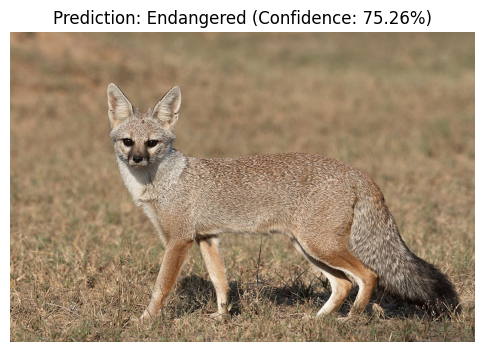

Prediction for /kaggle/input/90-different-animals-image-classification/wild_animals/Non Endangered/4f98c92165.jpg: Endangered
Confidence: 75.26%


In [ ]:
predict_and_display("4f98c92165.jpg")

Using image: /kaggle/input/90-different-animals-image-classification/wild_animals/Non Endangered/72e3e735f7.jpg
Raw prediction: [1]
Prediction probabilities: [0.48335831 0.51664169]


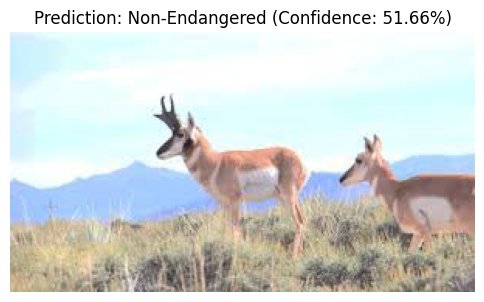

Confidence: 51.66%


In [ ]:
predict_and_display("72e3e735f7.jpg")

## **The End!**